<a href="https://colab.research.google.com/github/ishika-mittal/Stock-Prices-Analytics-Dashboard/blob/main/Exponential_Moving_Average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **I2: Exponential Moving Average (EMA)**

EMA is similar to SMA with just one difference - it gives more weight to recent prices in an attempt to make it more responsive to new information. 

Details: https://www.investopedia.com/terms/m/movingaverage.asp

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Installing yfinance library for fetching historical stock data
!pip install yfinance
import yfinance as yf

     |████████████████████████████████| 6.3MB 6.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=7934a9e4b718aefd43af8240dbca93aa7bfb2dae883a7be8f0cf16cb08815a68
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
#Function to get the stock data
def stock_data(stock, start_date, end_date):

    tickerSymbol = stock

    #get data on this ticker
    tickerData = yf.Ticker(tickerSymbol)

    #get the historical prices for this ticker
    tickerDf = tickerData.history(period='1d', start=start_date, end=end_date)

    return tickerDf

In [4]:
#Fetching a 1Y dataset for better representation

df = stock_data("ITC.BO", "2020-06-08", "2021-06-08")
df.reset_index(level="Date", inplace=True)
df.drop(columns = ['Dividends', 'Stock Splits'], inplace=True)

print(df.shape)
df.head()

(250, 6)


,Date,Open,High,Low,Close,Volume
0,2020-06-08,182.945035,184.074883,178.199672,178.742004,744734
1,2020-06-09,179.826649,186.289389,178.696801,179.510300,1341970
2,2020-06-10,180.052627,183.668142,179.284339,180.097824,1024793
3,2020-06-11,180.775730,181.905578,174.990912,175.894791,855456
4,2020-06-12,171.375387,176.482296,169.974373,175.352448,980250


In [5]:
#Creating a dataset with only Closing Price column and Date as index

data = df.sort_index(ascending=True,axis=0)
df1 = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    df1["Date"][i]=data['Date'][i]
    df1["Close"][i]=data["Close"][i]

df1.index=df1.Date
df1.drop("Date",axis=1,inplace=True)
print(df1.shape)
df1.head()

(250, 1)


,Close
Date,
2020-06-08,178.742
2020-06-09,179.51
2020-06-10,180.098
2020-06-11,175.895
2020-06-12,175.352


In [6]:
#Defining Function

def EMA(data, window_size):

  data1 = data
  data1 = pd.Series(data1["Close"])

  #Calculating Exponential Moving average for a given time period
  exponential_ma = data1.ewm(span = window_size, adjust = False).mean()
  #Parsing the results as a new column in the existing data frame
  data["Exponential_MA"] = exponential_ma

  return data

In [7]:
#Implementing the function
EMA(df1,30)
df1.head()

,Close,Exponential_MA
Date,,
2020-06-08,178.742,178.742004
2020-06-09,179.51,178.791572
2020-06-10,180.098,178.875846
2020-06-11,175.895,178.683520
2020-06-12,175.352,178.468612


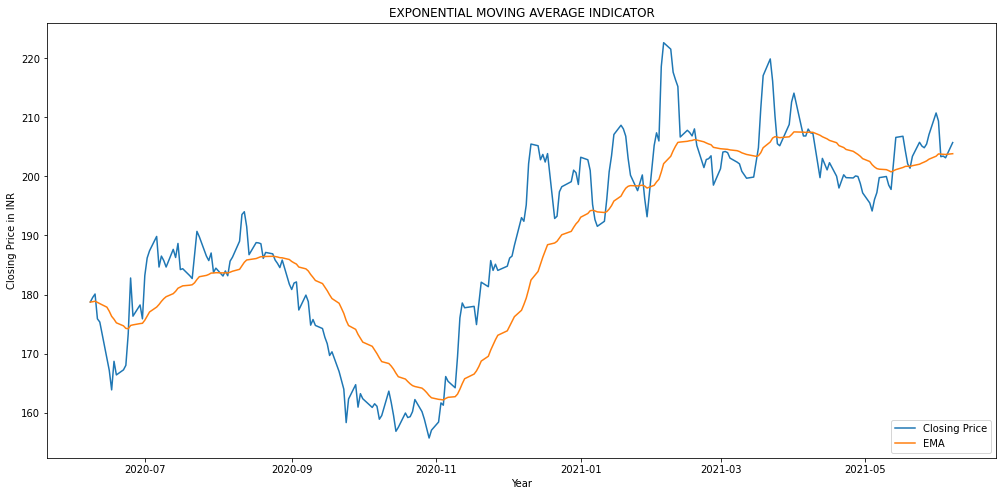

In [9]:
#Plotting Exponential Moving Average wrt to Closing Price

#Setting labels
plt.figure(figsize=(17,8))
plt.xlabel("Year")

plt.ylabel("Closing Price in INR")
plt.title("EXPONENTIAL MOVING AVERAGE INDICATOR")

#Let's go
plt.plot(df1[['Close', 'Exponential_MA']])
plt.legend(["Closing Price","EMA"], loc ="lower right")
plt.show()